# Predicting Fraudulent Transactions for a financial company

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [2]:
df = pd.read_csv('Fraud (1).csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Exploratory Data Analysis

In [3]:
df.shape

(6362620, 11)

In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [6]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
duplicate = df[df.duplicated()] 
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


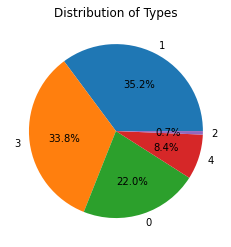

In [42]:
plt.pie(df['type'].value_counts(), labels=df['type'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Types')
plt.show()

In [9]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

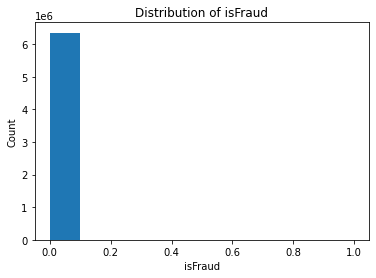

In [43]:
plt.hist(df['isFraud'])
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.title('Distribution of isFraud')
plt.show()

So only 0.13% of all the cases are fraud.

In [11]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [12]:
pd.set_option('display.float_format', '{:.2f}'.format) # To see actual values
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


In [13]:
df.describe(include='object') #checking onl for categorical features

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


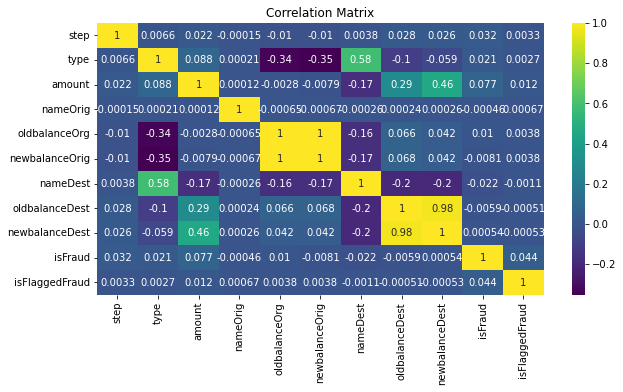

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()


So multicollinearity exists between oldbalanceOrg and newbalanceOrg; oldbalanceDest and newbalanceDest. Let us try to build the model without removing features.

## Feature engineering

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = {}
for i in df.select_dtypes('object').columns:
    encoder[i] = LabelEncoder()
    df[i] = encoder[i].fit_transform(df[i])

In [16]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0,0
2,1,4,181.00,1002156,181.00,0.00,439685,0.00,0.00,1,0
3,1,1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,1,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0,0


In [17]:
x = df.drop(columns=['isFraud'])
y = df['isFraud']

In [18]:
y.value_counts() #class 1 is minority class

0    6354407
1       8213
Name: isFraud, dtype: int64

In [19]:
over_sample = SMOTE(random_state=0)
x,y = over_sample.fit_resample(x,y)

In [20]:
y.value_counts() #resampled

0    6354407
1    6354407
Name: isFraud, dtype: int64

## Scaling values

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

## Train test split

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=0)

## Model training : Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

C:\Users\dhana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
y_pred = log_reg.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix(y_test,y_pred)

array([[1793435,  112540],
       [ 182687, 1723983]], dtype=int64)

In [27]:
accuracy_score(y_test, y_pred)

0.9225663548533892

Accuracy of the model turns out to be 92.25%.

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92   1905975
           1       0.94      0.90      0.92   1906670

    accuracy                           0.92   3812645
   macro avg       0.92      0.92      0.92   3812645
weighted avg       0.92      0.92      0.92   3812645



Trying to improve accuracy by removing multi-collinearity and selecting the best features

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
cvs = cross_val_score(log_reg,x,y,cv=3)
print(cvs)

C:\Users\dhana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dhana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.92982533 0.92877816 0.79421784]


In [31]:
cvs.mean()

0.8842737768015528

Cross validation score is less than accuracy. So this is a case of underfitting.

## Improving accuracy
Select the best 8 features

In [32]:
from sklearn.feature_selection import chi2, SelectKBest

In [33]:
best_fea = SelectKBest(chi2,k=8)
kbest = best_fea.fit_transform(x,y)
np.array(df.drop(columns=['isFraud']).columns)[best_fea.get_support()]

array(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'isFlaggedFraud'], dtype=object)

In [34]:
pd.DataFrame(list(zip(df.drop(columns=['isFraud']).columns, best_fea.scores_)),columns=['features','scores']).sort_values(by='scores',ascending=False)

,features,scores
6,nameDest,474754.63
0,step,224736.81
1,type,224500.27
2,amount,69360.40
5,newbalanceOrig,54537.22
4,oldbalanceOrg,28500.81
9,isFlaggedFraud,7129.00
7,oldbalanceDest,3651.01
3,nameOrig,97.83
8,newbalanceDest,7.01


Now we can build a new logistic regression model using only these 8 features

In [35]:
x_new = df[['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig','nameDest', 'oldbalanceDest', 'isFlaggedFraud']]
y_new = df['isFraud']

In [36]:
x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(x_new, y_new, test_size=0.30, random_state=0)

In [37]:
log_reg1 = LogisticRegression()
log_reg1.fit(x_new_train,y_new_train)

LogisticRegression()

In [38]:
y2_pred = log_reg1.predict(x_new_test)

In [39]:
confusion_matrix(y_new_test,y2_pred)

array([[1905845,     522],
       [   1538,     881]], dtype=int64)

In [40]:
accuracy_score(y_new_test,y2_pred)

0.9989207800141032

In [41]:
print(classification_report(y_new_test,y2_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906367
           1       0.63      0.36      0.46      2419

    accuracy                           1.00   1908786
   macro avg       0.81      0.68      0.73   1908786
weighted avg       1.00      1.00      1.00   1908786



### So final accuracy turns out to be 99.89%, which is a big improvement from previous case